In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('CLAS12_ECAL_PCAL_S2_2023-12-17_08-37-33.csv')  #  90nA, 11.0GB
#df = pd.read_csv('CLAS12_ECAL_PCAL_S2_2023-12-17_08-51-31.csv')  #  10nA,  6.4GB
# df = pd.read_csv('CLAS12_ECAL_PCAL_S2_2023-12-17_09-08-04.csv')  # 100nA, 16.2GB
# df = pd.read_csv('CLAS12_ECAL_PCAL_S2_2023-12-17_09-29-15.csv')  #  50nA,  9.5GB
# df = pd.read_csv('CLAS12_ECAL_PCAL_S2_2023-12-17_09-44-43.csv')  # 150nA, 14.1GB
#df = pd.read_csv('CLAS12_ECAL_PCAL_S2_2023-12-17_10-00-51.csv')  #  75nA, 12.0GB
# df = pd.read_csv('CLAS12_ECAL_PCAL_S2_2023-12-17_10-18-11.csv')  #  25nA,  7.2GB


df1 = df[df['DestinationPort'] == 7001].copy()
df2 = df[df['DestinationPort'] == 7002].copy()
df3 = df[df['DestinationPort'] == 7003].copy()
df4 = df[df['DestinationPort'] == 7004].copy()

# Time difference between subsequent packets in milliseconds
df1['time_diff'] = df1['Timestamp'].diff()*1E3
df2['time_diff'] = df2['Timestamp'].diff()*1E3
df3['time_diff'] = df3['Timestamp'].diff()*1E3
df4['time_diff'] = df4['Timestamp'].diff()*1E3

df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

# Time difference between first and last packet
d_total = len(df)*1.5E-3  # in MB
t_total = df['Timestamp'].max() - df['Timestamp'].min()
t_total1 = df1['Timestamp'].max() - df1['Timestamp'].min()
t_total2 = df2['Timestamp'].max() - df2['Timestamp'].min()
t_total3 = df3['Timestamp'].max() - df3['Timestamp'].min()
t_total4 = df4['Timestamp'].max() - df4['Timestamp'].min()

print(f'Number of packets: {len(df)} (or about {len(df)/4.0E6:.2f}M packets per stream)')
print(f'Total time for run: {t_total:.2f}s (={t_total/60.0:.2f}mins)')
print(f'Total data (approx.): {d_total*1.0E-3:.2f}GB')
print(f'Total rate (approx.): {d_total/t_total:.2f}MB/s')
print(f'  port 7001: {len(df1)} packets (or about {len(df1)*1.5E-3/t_total1:.2f}MB/s)')
print(f'  port 7002: {len(df2)} packets (or about {len(df2)*1.5E-3/t_total2:.2f}MB/s)')
print(f'  port 7003: {len(df3)} packets (or about {len(df3)*1.5E-3/t_total3:.2f}MB/s)')
print(f'  port 7004: {len(df4)} packets (or about {len(df4)*1.5E-3/t_total4:.2f}MB/s)')
df1.head()

Number of packets: 7373416 (or about 1.84M packets per stream)
Total time for run: 675.49s (=11.26mins)
Total data (approx.): 11.06GB
Total rate (approx.): 16.37MB/s
  port 7001: 2256479 packets (or about 5.02MB/s)
  port 7002: 2170373 packets (or about 4.86MB/s)
  port 7003: 1585000 packets (or about 3.52MB/s)
  port 7004: 1361560 packets (or about 3.19MB/s)


,Timestamp,CaptureLength,TotalLength,DestinationPort,seq,ack,time_diff
3,1.702820e+09,60,60,7001,18791477,234468005,0.113010
8,1.702821e+09,1494,1494,7001,18791477,234468005,103016.021013
11,1.702821e+09,1494,1494,7001,18792917,234468005,0.131845
14,1.702821e+09,1494,1494,7001,18794357,234468005,0.131130
18,1.702821e+09,1494,1494,7001,18795797,234468005,0.196934


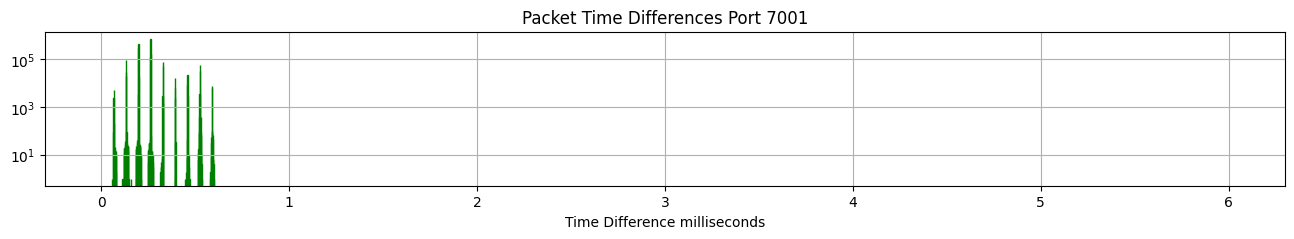

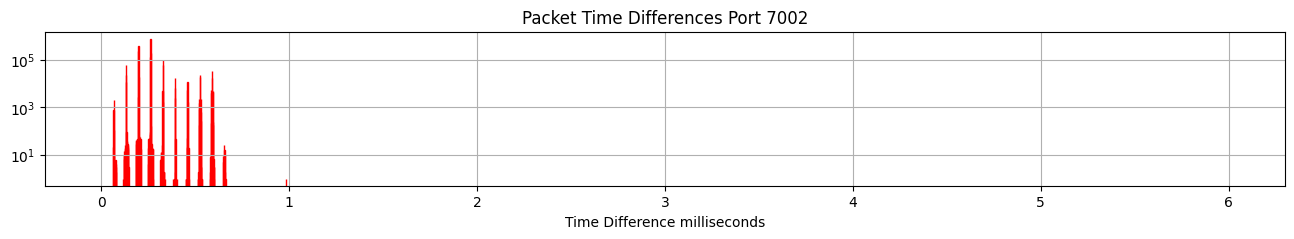

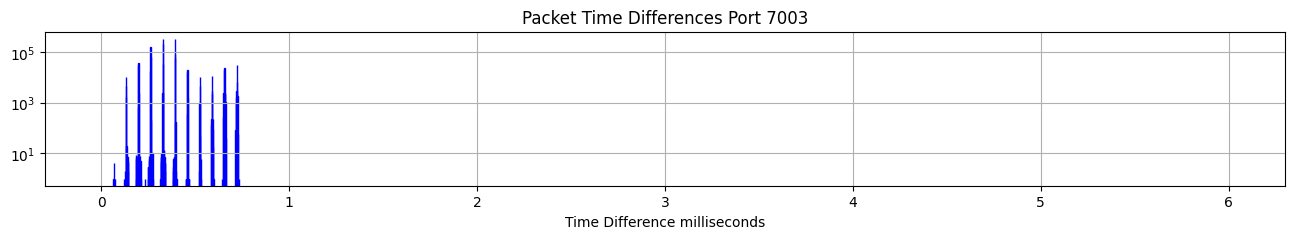

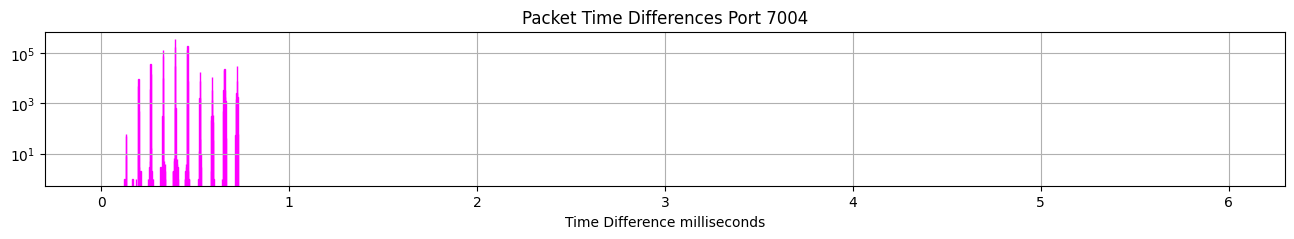

In [37]:

plt.figure(figsize=(16,2))
plt.hist(df1['time_diff'], bins=5000, edgecolor='green', range=[0.0, 6.0E0], log=True)
plt.title('Packet Time Differences Port 7001')
plt.xlabel('Time Difference milliseconds') 
plt.grid()
plt.show()

plt.figure(figsize=(16,2))
plt.hist(df2['time_diff'], bins=5000, edgecolor='red', range=[0.0, 6.0E0], log=True)
plt.title('Packet Time Differences Port 7002')
plt.xlabel('Time Difference milliseconds') 
plt.grid()
plt.show()

plt.figure(figsize=(16,2))
plt.hist(df3['time_diff'], bins=5000, edgecolor='blue', range=[0.0, 6.0E0], log=True)
plt.title('Packet Time Differences Port 7003')
plt.xlabel('Time Difference milliseconds') 
plt.grid()
plt.show()

plt.figure(figsize=(16,2))
plt.hist(df4['time_diff'], bins=5000, edgecolor='magenta', range=[0.0, 6.0E0], log=True)
plt.title('Packet Time Differences Port 7004')
plt.xlabel('Time Difference milliseconds') 
plt.grid()
plt.show()

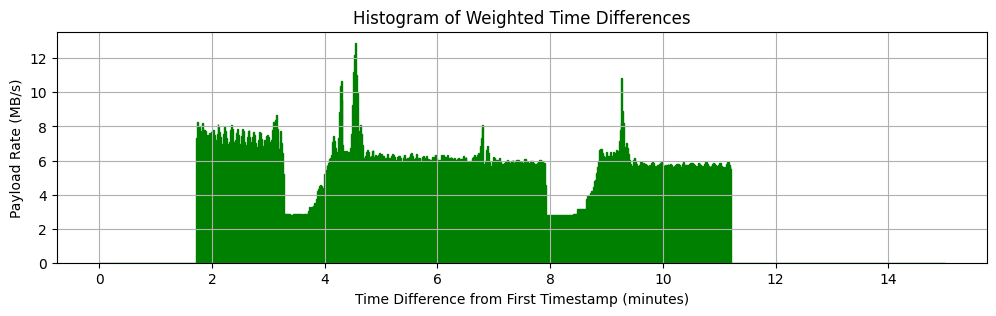

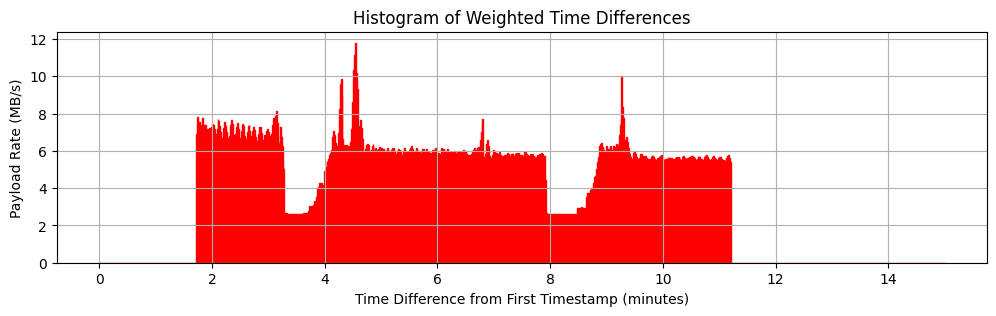

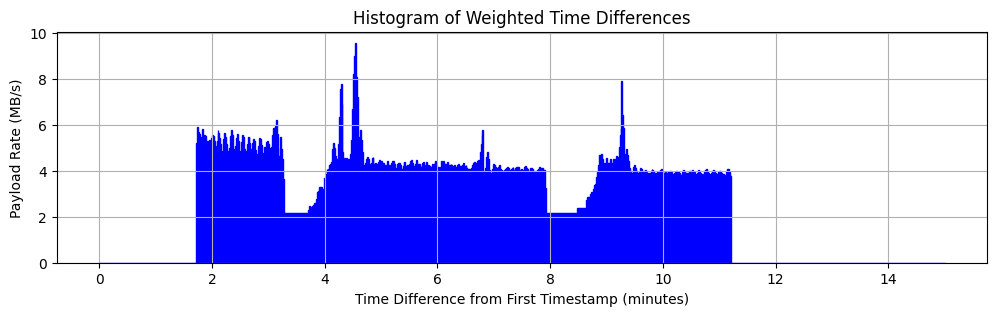

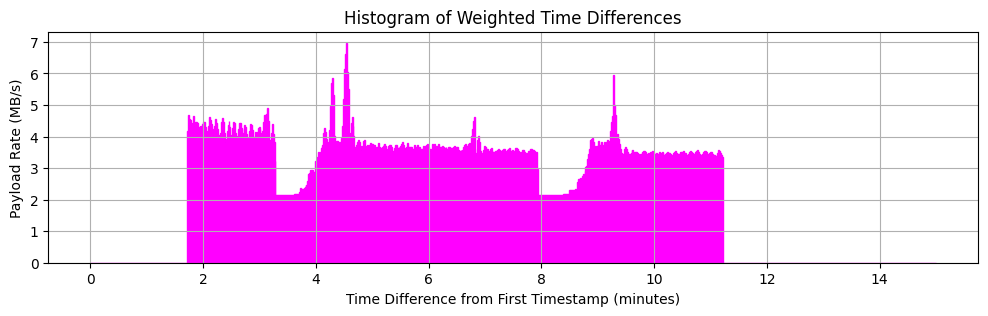

In [38]:
# Calculate time differences from the first row's Timestamp (in minutes)
time_diffs1 = (df1['Timestamp'] - df['Timestamp'].iloc[0])/60.0
time_diffs2 = (df2['Timestamp'] - df['Timestamp'].iloc[0])/60.0
time_diffs3 = (df3['Timestamp'] - df['Timestamp'].iloc[0])/60.0
time_diffs4 = (df4['Timestamp'] - df['Timestamp'].iloc[0])/60.0

# Define histogram parameters
bin_width = 1  # seconds
total_range = 15 * 60  # 15 minutes in seconds
bins = int(total_range / bin_width)

# Create the histograms
plt.figure(figsize=(12, 3))
plt.hist(time_diffs1, bins=bins, range=[0.0, 15.0], weights=df1['CaptureLength']/1.0E6, edgecolor='green')
plt.title('Histogram of Weighted Time Differences')
plt.xlabel('Time Difference from First Timestamp (minutes)')
plt.ylabel('Payload Rate (MB/s)')
plt.grid()
plt.show()

plt.figure(figsize=(12, 3))
plt.hist(time_diffs2, bins=bins, range=[0.0, 15.0], weights=df2['CaptureLength']/1.0E6, edgecolor='red')
plt.title('Histogram of Weighted Time Differences')
plt.xlabel('Time Difference from First Timestamp (minutes)')
plt.ylabel('Payload Rate (MB/s)')
plt.grid()
plt.show()

plt.figure(figsize=(12, 3))
plt.hist(time_diffs3, bins=bins, range=[0.0, 15.0], weights=df3['CaptureLength']/1.0E6, edgecolor='blue')
plt.title('Histogram of Weighted Time Differences')
plt.xlabel('Time Difference from First Timestamp (minutes)')
plt.ylabel('Payload Rate (MB/s)')
plt.grid()
plt.show()

plt.figure(figsize=(12, 3))
plt.hist(time_diffs4, bins=bins, range=[0.0, 15.0], weights=df4['CaptureLength']/1.0E6, edgecolor='magenta')
plt.title('Histogram of Weighted Time Differences')
plt.xlabel('Time Difference from First Timestamp (minutes)')
plt.ylabel('Payload Rate (MB/s)')
plt.grid()
plt.show()

In [39]:
import numpy as np

# # Step 1: Extract the 'seq' column and sort it
# seq_array = df1['seq'].sort_values().values

# # Step 2: Calculate the differences between consecutive elements
# seq_diff = np.diff(seq_array)

# # Step 3: Count how many differences are less than or equal to 0
# count_nonpositive_diff = np.sum(seq_diff <= 0)

# # Output the count
# print(f"Number of non-positive differences: {count_nonpositive_diff}")


# Step 1: Sort df1 by 'seq' and reset the index
sorted_df = df1.sort_values(by='seq').reset_index(drop=True)

# Step 2: Calculate the differences between consecutive 'seq' values
seq_diff = np.diff(sorted_df['seq'].values)

# Step 3: Find the indices where the difference is less than or equal to 0
nonpositive_diff_indices = np.where(seq_diff <= 0)[0] + 1  # +1 because np.diff reduces the length by 1

# Step 4: Print the rows corresponding to these indices
for idx in nonpositive_diff_indices:
    print(f'{idx}: {sorted_df.iloc[idx]}')


1: Timestamp          1.702821e+09
CaptureLength      1.494000e+03
TotalLength        1.494000e+03
DestinationPort    7.001000e+03
seq                1.879148e+07
ack                2.344680e+08
time_diff          1.030160e+05
Name: 1, dtype: float64
